## Leaf Classification

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
data = pd.read_csv('../../Dataset/Leaf Classification/train.csv')
data.head()
ID = data.pop('id').values.tolist()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


In [5]:
parent_data = data.copy()

In [6]:
print 'Number of Species: {}'.format(len(data.species.unique()))

Number of Species: 99


In [7]:
y = data.pop('species')

In [8]:
y.head()

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object

In [9]:
data.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


### Benchmark Model Using Logistic Regression

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label = LabelEncoder().fit(y)
y = label.transform(y)
print y.shape

(990,)


In [12]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(data).transform(data)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1000,tol=0.001,solver='lbfgs',multi_class='multinomial')

In [ ]:
print X.shape,y.shape

In [ ]:
log.fit(X,y)

In [ ]:
from sklearn.metrics import accuracy_score
print 'Train logloss: {}'.format(log_loss(y,log.predict_proba(X)))

In [ ]:
print len(np.unique(log.predict(X)))

### Dimensionality Reduction and Visualizing the Data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [ ]:
pca.fit(data)
T = pca.transform(data)
print T.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs=T[:,0],ys=T[:,1],zs=T[:,2],c=y, cmap = 'spectral',marker='o')

In [ ]:
print 'Variance retained: {}'.format(pca.explained_variance_ratio_.sum())

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5,n_components=3)

In [ ]:
iso.fit(data)
T = iso.transform(data)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs=T[:,0],ys=T[:,1],zs=T[:,2],c=y,cmap='spectral',marker='o')

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X,y)

In [ ]:
print X.shape,y.shape

In [ ]:
print 'Train LogLoss: {}'.format(log_loss(y,knn.predict_proba(X)))

## Using Neural Networks

In [104]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.utils.np_utils import to_categorical

In [153]:
model = Sequential()
model.add(Dense(1024,input_dim=192))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [154]:
y_cat = to_categorical(y)
print y_cat.shape

(990, 99)


In [155]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

In [146]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(693, 192) (693, 99)


In [158]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop')

In [148]:
hist = model.fit(X_train,y_train,batch_size=128,nb_epoch=100,verbose=0)

In [149]:
model.evaluate(X_test,y_test)

297/297 [==============================] - 0s     


0.035658509497176416

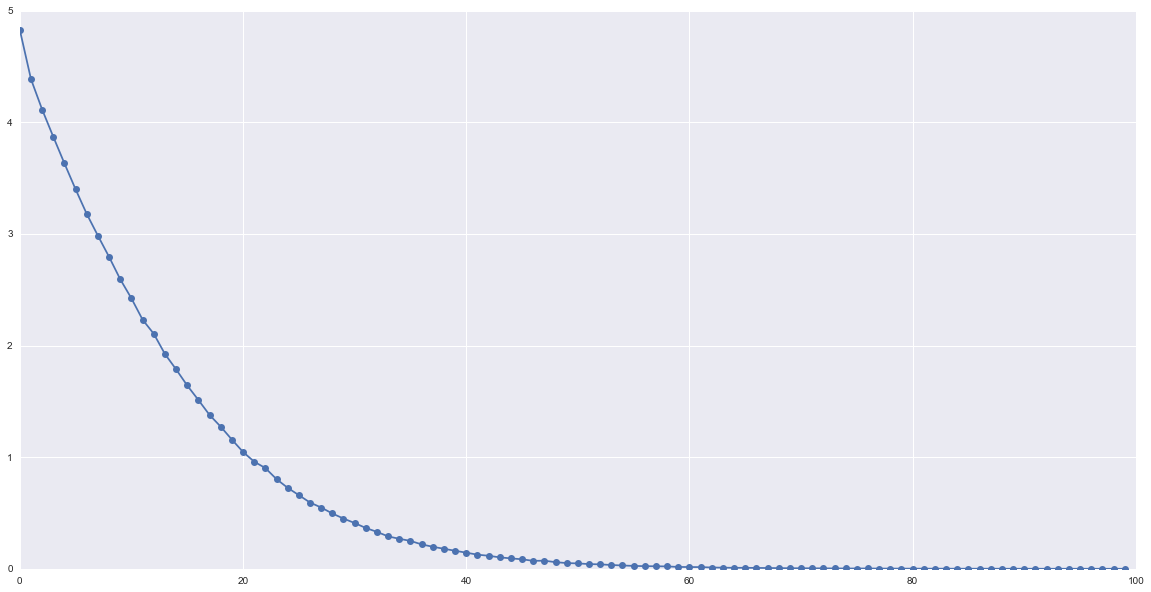

In [150]:
plt.plot(hist.history['loss'], 'o-')

### Submission File

In [156]:
print X.shape,y_cat.shape

(990, 192) (990, 99)


In [159]:
history = model.fit(X,y_cat,batch_size=128,nb_epoch=100,verbose=0)

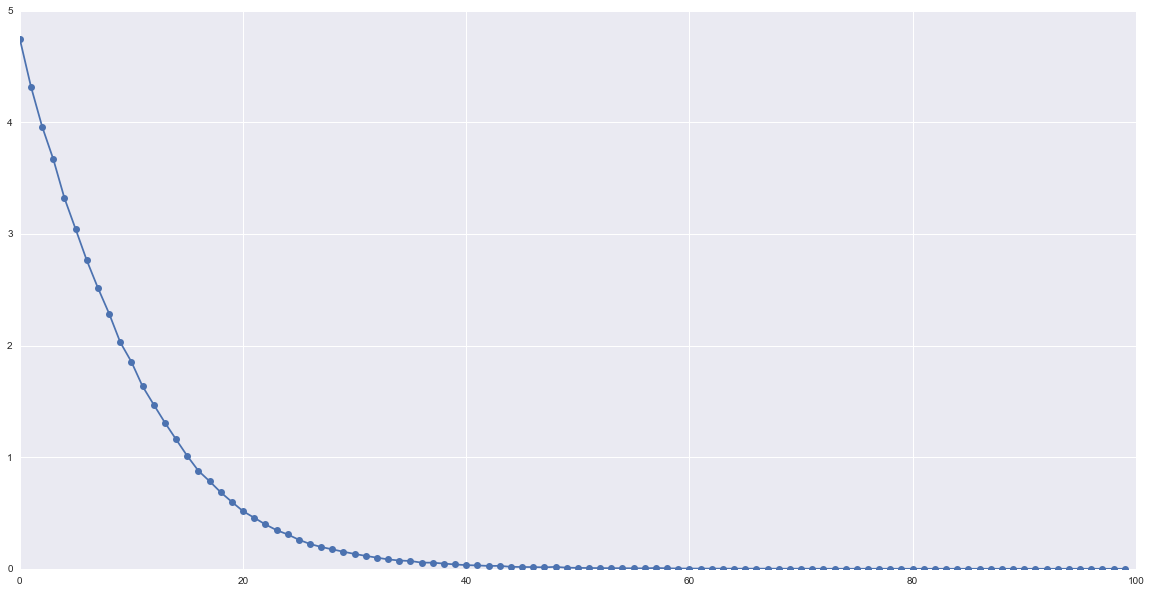

In [160]:
plt.plot(history.history['loss'],'o-')

In [164]:
yPred = model.predict_proba(test)

594/594 [==============================] - 0s     


In [165]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_60 (Dense)                   (None, 1024)        197632      dense_input_17[0][0]             
____________________________________________________________________________________________________
dropout_41 (Dropout)               (None, 1024)        0           dense_60[0][0]                   
____________________________________________________________________________________________________
activation_60 (Activation)         (None, 1024)        0           dropout_41[0][0]                 
____________________________________________________________________________________________________
dense_61 (Dense)                   (None, 512)         524800      activation_60[0][0]              
___________________________________________________________________________________________

In [52]:
print test.shape
print X.shape

(594, 192)
(990, 192)


### Ensembling KNN and Logistic Regression

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
knn.fit(X,y)
yPred_knn = knn.predict_proba(X)

In [ ]:
log.fit(X,y)
yPred_rfc = log.predict_proba(X)

In [ ]:
for i in np.arange(0.1,0.9,0.1):
    print 'KNN Weight: {}, RFC Weight: {}'.format(i,1-i)
    print 'Train Accuracy: {}'.format(log_loss(y,i*yPred_knn+(1-i)*yPred_rfc))

### Submission File

In [45]:
test = pd.read_csv('../../Dataset/Leaf Classification/test.csv')
print test.shape

(594, 193)


In [46]:
index = test.pop('id')
test.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [162]:
test = StandardScaler().fit(test).transform(test)
print test.shape

(594, 192)


In [ ]:
yPred = np.asarray(knn.predict_proba(test)*0.1+0.9*log.predict_proba(test))
print yPred.shape

In [166]:
yPred = pd.DataFrame(yPred,index=index,columns=sort(parent_data.species.unique()))

In [169]:
print yPred.shape
yPred.head()

(594, 99)


,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,8.250378e-13,2.674631e-13,1.682289e-18,4.023111e-11,5.009271e-14,2.503916e-12,2.223052e-16,1.571607e-15,7.896714e-14,2.156174e-11,...,1.103551e-16,1.348195e-12,7.108242e-13,1.769515e-15,2.008486e-12,1.433335e-15,3.287010e-17,3.961563e-18,6.526260e-10,4.193915e-17
7,8.043230e-16,1.773625e-13,7.934054e-13,3.430227e-10,3.710277e-17,1.597352e-12,7.884517e-12,4.964242e-15,3.421890e-17,1.163384e-14,...,4.619878e-16,4.495267e-15,9.352260e-16,9.992173e-18,1.154697e-21,9.350603e-12,3.395033e-14,7.814122e-12,2.785987e-13,1.487000e-12
9,1.274182e-12,9.999990e-01,5.787515e-13,4.182889e-16,9.273551e-07,1.741116e-11,1.589313e-15,8.142929e-11,1.999175e-08,5.956451e-10,...,8.034556e-13,2.562622e-16,3.370137e-15,2.892225e-15,5.483142e-15,1.314609e-12,2.513024e-11,4.518399e-17,4.484560e-14,2.333921e-09
12,2.384094e-13,2.625938e-05,6.563423e-10,1.736659e-13,6.135270e-12,1.386438e-12,7.524651e-08,5.753739e-10,3.037425e-10,6.635764e-10,...,2.879594e-12,5.743634e-16,2.546240e-12,2.448773e-13,7.171803e-16,3.315575e-08,1.157239e-06,3.574442e-12,4.418308e-13,5.308473e-07
13,4.504569e-15,6.619681e-10,7.099443e-18,1.122037e-16,2.581468e-11,6.891031e-16,1.371739e-12,7.935735e-12,1.841074e-08,3.965278e-12,...,3.019697e-13,8.104137e-18,9.803476e-12,7.124498e-14,1.060682e-10,5.777554e-11,5.820589e-08,3.609045e-15,5.743071e-13,4.109885e-14


In [170]:
fp = open('submission.csv','wb')
fp.write(yPred.to_csv())

## Considering the Images

In [ ]:
import glob
from scipy.misc import imread
from PIL import Image
import pandas as pd
import numpy as np

In [ ]:
data_train,data_test = {},{}
for fname in glob.glob('../../Dataset/Leaf Classification/images/*.jpg'):
    image = Image.open(fname)
    image.thumbnail((20, 20), Image.ANTIALIAS)
    image = np.asarray(image).reshape(image.size[0]*image.size[1])
    i = int(fname.split('/')[-1].split('.')[0])
    if i in ID:
        data_train[i] = (np.asarray(image.tolist() + [0 for j in range(400-image.shape[0])]))
    else:
        data_test[i] = (np.asarray(image.tolist() + [0 for j in range(400-image.shape[0])]))

In [ ]:
data_train = pd.DataFrame(data_train.values(),columns=['pixel{}'.format(i) for i in range(400)],index=data_train.keys())
data_train.head()

In [ ]:
data_test = pd.DataFrame(data_test.values(),columns=['pixel{}'.format(i) for i in range(400)],index=data_test.keys())
data_test.head()

In [ ]:
print 'TRAIN DATA SHAPE: {}'.format(data_train.shape)
print 'TEST DATA SHAPE: {}'.format(data_test.shape)

In [ ]:
%pylab inline
print data_train.index[0]
plt.imshow(data_train.iloc[0,:].reshape(20,20))

In [ ]:
print data_test.index[0]
plt.imshow(data_test.iloc[0,:].reshape(20,20),cmap='gray')

In [ ]:
print data_test.index[1]
plt.imshow(data_test.iloc[1,:].reshape(20,20))

In [ ]:
species = parent_data.species.astype('category').cat.codes
species.head()